# INFANT MORTALITY PREDICTIONS WITH MACHINE LEARNING

## Introduction

Infant mortality is the death of an infant within the first year of life and continues to be a very prominent issue within developed nations such as the United States. According to the Centers for Disease Control and Prevention (CDC), a total of 23,455 deaths occurred in children under the age of 1 year in 2015, which represents an increase of 240 deaths from the previous year. The infant mortality rate is an important marker of the overall health of a society. 

There are many determinants that impact infant mortality. The Linked Death files collected by the National Bureau of Economic Research from the National Vital Statistics System of the National Center for Health Statistics includes deaths to all infants born in the same calendar year for which the death certificate can be linked to a birth certificate in the denominator file. We will be working with the 2015 Linked Death files, the last calendar year for which such data is available.

The objective of this project was to create a machine learning classification model that would predict the top 3 causes of infant death based on 8 user feature inputs. The causes of death were categorized according to the International Classification of Diseases, Tenth Revision (ICD-10).

#### 1. Importing Relevant Packages

#### 2. Exploratory Data Analysis

#### 3. Basic Data Transformation

#### 4. Constructing the DataFrame

#### 5. Search for Best Features and Fine-Tuning Parameters

### Importing Relevant Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import (
    GradientBoostingClassifier, 
    RandomForestClassifier,
    StackingClassifier,
    VotingClassifier)
from sklearn.model_selection import (
    GridSearchCV,
    train_test_split)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    confusion_matrix,
    classification_report, 
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_recall_fscore_support,
    average_precision_score,
    precision_score,
    recall_score)
import pickle
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

### Exploratory Data Analysis

Data is downloaded directly from the 2015 Linked Birth/Infant Death Cohort Data from the National Bureau of Economic Research.

In [2]:
df = pd.read_csv('linkco2015usnum.csv',low_memory=False)
df

,laterec,dob_yy,dob_mm,dob_tt,dob_wk,bfacil,f_bfacil,bfacil3,mageimp,magerep,...,record_16,record_17,record_18,record_19,record_20,d_restatus,hospd,dweekday,dod_yy,dod_mm
0,0,2015,1,1504,5,1,1,1,1,1,...,2,2,2,2,2,2,1,2,2015,1
1,0,2015,1,1752,7,1,1,1,2,2,...,1,1,1,1,1,1,2,2,2015,4
2,0,2015,1,1222,2,1,1,1,3,3,...,1,1,1,1,1,1,1,2,2015,1
3,0,2015,1,1107,6,1,1,1,2,2,...,1,1,1,1,1,1,2,7,2015,5
4,0,2015,1,613,3,1,1,1,2,2,...,1,1,1,1,1,1,1,3,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23352,0,2015,9,1130,6,1,1,1,2,2,...,3,3,3,3,3,3,2,1,2016,1
23353,0,2015,10,730,5,1,1,1,2,2,...,3,3,3,3,3,3,1,6,2015,10
23354,0,2015,11,1847,4,1,1,1,1,1,...,1,1,1,1,1,1,2,3,2016,2
23355,0,2015,11,444,7,1,1,1,2,2,...,1,1,1,1,1,1,1,7,2015,11


In [3]:
#Look at the unique values in each column
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column '{col}': {unique_values}")

Column 'laterec': [0]
Column 'dob_yy': [2015]
Column 'dob_mm': [ 1  2  3  4  5  6  7  8  9 10 11 12]
Column 'dob_tt': [1504 1752 1222 ...  202  629  539]
Column 'dob_wk': [5 7 2 6 3 4 1]
Column 'bfacil': [1 4 5 6 2 7 3 0 9]
Column 'f_bfacil': [1 0 2]
Column 'bfacil3': [1 2 3]
Column 'mageimp': [1 2 3 4 5]
Column 'magerep': [1 2 3 4 5]
Column 'mager': [18 20 32 25 24 35 28 30 26 27 23 19 21 22 33 38 34 17 29 31 37 16 39 36
 40 15 43 44 42 41 46 47 50 45 49 14 48 13 12]
Column 'mager14': [ 6  8 10  9 11  7  5  4 12  3 13 14  1]
Column 'mager9': [2 3 5 4 6 7 8 9 1]
Column 'mbstate_rec': [1 2 3]
Column 'restatus': [1 2 3 4]
Column 'mrace31': [ 1  2 19  6  4  3 10  5 11 13 14 25 15  8 23 16 12 21  9  7 99 20 22 30
 28]
Column 'mrace6': [1 2 6 4 3 5 9]
Column 'mrace15': [ 1  2 15  9  5 10  3  7 13  6  8  4 14 12 11 99]
Column 'mbrace': [1 2 4 3]
Column 'mraceimp': [1 0 4 2 5 3 9]
Column 'mhisp_r': [5 0 1 4 2 9 3]
Column 'f_mhisp': [1 2 7 6 8 3 0 4 5]
Column 'mracehisp': [7 2 1 6 4 3 5 8]
Col

Column 'enicon_1': ['P290' 'I469' 'Q602' 'R95' 'P285' 'P072' 'A090' 'R99' 'I678' 'Q897'
 'P219' 'J189' 'P523' 'P220' 'P239' 'P018' 'Q789' 'T71' 'P522' 'R090'
 'P269' 'I429' 'A419' 'J849' 'Q249' 'P77' 'I272' 'P073' 'J690' 'Q000'
 'I509' 'P364' 'T07' 'R688' 'P251' 'I959' 'P209' 'J840' 'Q042' 'P369'
 'E875' 'P280' 'P291' 'R278' 'R092' 'P543' 'P368' 'Q917' 'A391' 'Q043'
 'P293' 'P780' 'R001' 'I519' 'Q336' 'J969' 'Q211' 'Q913' 'P916' 'Q771'
 'Q248' 'B99' 'Q899' 'P026' 'D761' 'P968' 'Q049' 'T179' 'I288' 'P352'
 'I629' 'S069' 'G002' 'A415' 'I279' 'D849' 'T670' 'P960' 'P614' 'C793'
 'P234' 'P288' 'A499' 'N19' 'J984' 'J129' 'P832' 'P60' 'Q234' 'P005'
 'P398' 'J961' 'T149' 'P284' 'J14' 'Q798' 'Q999' 'P011' 'E46' 'K550'
 'Q790' 'P292' 'P229' 'Q799' 'G709' 'P362' 'J156' 'Q059' 'Q870' 'P236'
 'C959' 'G934' 'J154' 'S099' 'Q774' 'Q929' 'P210' 'A029' 'K659' 'G931'
 'R570' 'Q639' 'Q02' 'T818' 'T751' 'N185' 'Q878' 'G938' 'I500' 'I515'
 'T436' 'K297' 'B49' 'P524' 'Q039' 'P378' 'P298' 'Q601' 'R579' 'P548'

In [4]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23357 entries, 0 to 23356
Data columns (total 343 columns):
 #    Column       Non-Null Count  Dtype  
---   ------       --------------  -----  
 0    laterec      23357 non-null  int64  
 1    dob_yy       23357 non-null  int64  
 2    dob_mm       23357 non-null  int64  
 3    dob_tt       23357 non-null  int64  
 4    dob_wk       23357 non-null  int64  
 5    bfacil       23357 non-null  int64  
 6    f_bfacil     23357 non-null  int64  
 7    bfacil3      23357 non-null  int64  
 8    mageimp      23357 non-null  int64  
 9    magerep      23357 non-null  int64  
 10   mager        23357 non-null  int64  
 11   mager14      23357 non-null  int64  
 12   mager9       23357 non-null  int64  
 13   mbstate_rec  23357 non-null  int64  
 14   restatus     23357 non-null  int64  
 15   mrace31      23357 non-null  int64  
 16   mrace6       23357 non-null  int64  
 17   mrace15      23357 non-null  int64  
 18   mbrace       23357 non-n

## Basic Data Transformation

In [5]:
#Transform the 'sex' column
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['sex']

0        1
1        0
2        1
3        0
4        1
        ..
23352    1
23353    1
23354    0
23355    1
23356    1
Name: sex, Length: 23357, dtype: int64

### Constructing the DataFrame 

After looking through the User Guide for the 2015 Period Linked Birth/Infant Death Data Set, we realized that many of the features were simply variations of the same main feature. For example, the mother's race had several corresponding features where it could be categorized into 6, 15, or even 31 groups. As a result, we decided to take only the features that had only int64 values.  

There were 130 selected causes of infant death adapted for use from the International Classification of Diseases. Since these were too many classes, we further grouped them into larger categories while still following the ICD-10 codes. 

In [6]:
#Create dataframe with only 'int64' values
df_int = df.select_dtypes(include='int64')
df_int

,laterec,dob_yy,dob_mm,dob_tt,dob_wk,bfacil,f_bfacil,bfacil3,mageimp,magerep,...,record_16,record_17,record_18,record_19,record_20,d_restatus,hospd,dweekday,dod_yy,dod_mm
0,0,2015,1,1504,5,1,1,1,1,1,...,2,2,2,2,2,2,1,2,2015,1
1,0,2015,1,1752,7,1,1,1,2,2,...,1,1,1,1,1,1,2,2,2015,4
2,0,2015,1,1222,2,1,1,1,3,3,...,1,1,1,1,1,1,1,2,2015,1
3,0,2015,1,1107,6,1,1,1,2,2,...,1,1,1,1,1,1,2,7,2015,5
4,0,2015,1,613,3,1,1,1,2,2,...,1,1,1,1,1,1,1,3,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23352,0,2015,9,1130,6,1,1,1,2,2,...,3,3,3,3,3,3,2,1,2016,1
23353,0,2015,10,730,5,1,1,1,2,2,...,3,3,3,3,3,3,1,6,2015,10
23354,0,2015,11,1847,4,1,1,1,1,1,...,1,1,1,1,1,1,2,3,2016,2
23355,0,2015,11,444,7,1,1,1,2,2,...,1,1,1,1,1,1,1,7,2015,11


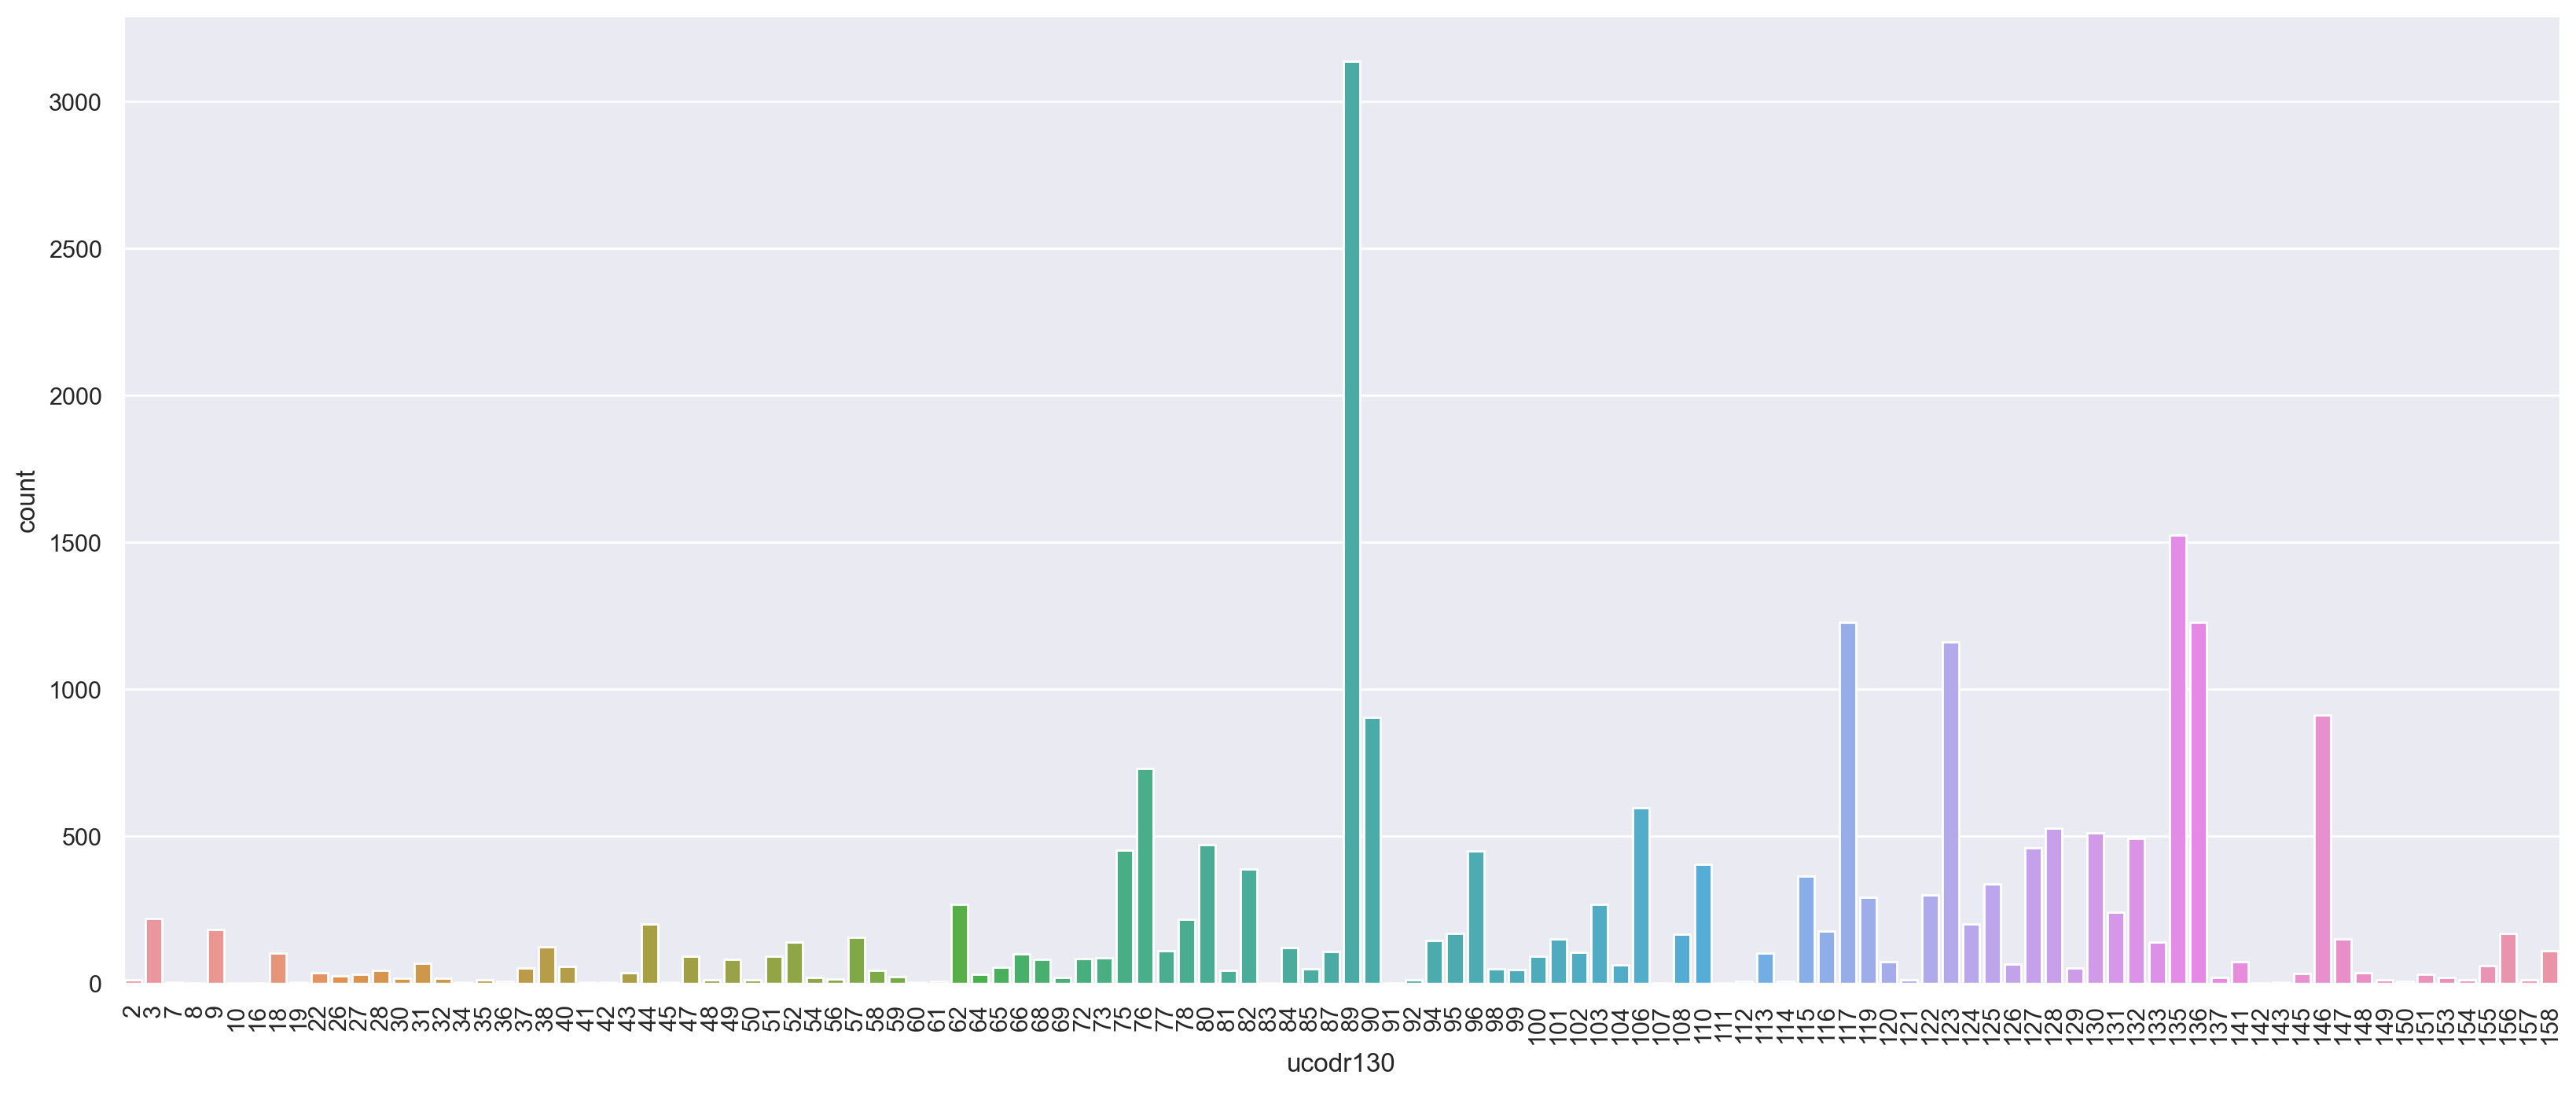

In [7]:
#130 selected causes of infant death
plt.figure(figsize=(20,8),dpi=200)
sns.countplot(x='ucodr130',data=df_int)
plt.xticks(rotation=90)
plt.show()

In [8]:
unique_counts = df_int.ucodr130.value_counts()
unique_counts.head(20).sum()/len(df_int)
print(f"Top 20 causes of Infant Death make up {unique_counts.head(20).sum()/len(df_int)*100}% of deaths")

Top 20 causes of Infant Death make up 69.76067131909063% of deaths


In [9]:
#Categorize causes of death into 17 classes for a better model
df_int['ucodr130copy'] = df_int['ucodr130']

df_int.loc[(df_int['ucodr130copy'] >= 1) & (df_int['ucodr130copy'] <= 22), 'ucodr130copy'] = 1
df_int.loc[(df_int['ucodr130copy'] >= 23) & (df_int['ucodr130copy'] <= 28), 'ucodr130copy'] = 23
df_int.loc[(df_int['ucodr130copy'] >= 29) & (df_int['ucodr130copy'] <= 32), 'ucodr130copy'] = 29
df_int.loc[(df_int['ucodr130copy'] >= 33) & (df_int['ucodr130copy'] <= 38), 'ucodr130copy'] = 33
df_int.loc[(df_int['ucodr130copy'] >= 39) & (df_int['ucodr130copy'] <= 44), 'ucodr130copy'] = 39
df_int.loc[(df_int['ucodr130copy'] == 45), 'ucodr130copy'] = 45
df_int.loc[(df_int['ucodr130copy'] >= 46) & (df_int['ucodr130copy'] <= 52), 'ucodr130copy'] = 46
df_int.loc[(df_int['ucodr130copy'] >= 53) & (df_int['ucodr130copy'] <= 62), 'ucodr130copy'] = 53
df_int.loc[(df_int['ucodr130copy'] >= 63) & (df_int['ucodr130copy'] <= 66), 'ucodr130copy'] = 63
df_int.loc[(df_int['ucodr130copy'] >= 67) & (df_int['ucodr130copy'] <= 69), 'ucodr130copy'] = 67
df_int.loc[(df_int['ucodr130copy'] >= 70) & (df_int['ucodr130copy'] <= 108), 'ucodr130copy'] = 70
df_int.loc[(df_int['ucodr130copy'] >= 109) & (df_int['ucodr130copy'] <= 117), 'ucodr130copy'] = 109
df_int.loc[(df_int['ucodr130copy'] >= 118) & (df_int['ucodr130copy'] <= 133), 'ucodr130copy'] = 118
df_int.loc[(df_int['ucodr130copy'] >= 134) & (df_int['ucodr130copy'] <= 136), 'ucodr130copy'] = 134
df_int.loc[(df_int['ucodr130copy'] == 137), 'ucodr130copy'] = 137
df_int.loc[(df_int['ucodr130copy'] >= 138) & (df_int['ucodr130copy'] <= 157), 'ucodr130copy'] = 138
df_int.loc[(df_int['ucodr130copy'] == 158), 'ucodr130copy'] = 158

df_int

,laterec,dob_yy,dob_mm,dob_tt,dob_wk,bfacil,f_bfacil,bfacil3,mageimp,magerep,...,record_17,record_18,record_19,record_20,d_restatus,hospd,dweekday,dod_yy,dod_mm,ucodr130copy
0,0,2015,1,1504,5,1,1,1,1,1,...,2,2,2,2,2,1,2,2015,1,70
1,0,2015,1,1752,7,1,1,1,2,2,...,1,1,1,1,1,2,2,2015,4,118
2,0,2015,1,1222,2,1,1,1,3,3,...,1,1,1,1,1,1,2,2015,1,118
3,0,2015,1,1107,6,1,1,1,2,2,...,1,1,1,1,1,2,7,2015,5,134
4,0,2015,1,613,3,1,1,1,2,2,...,1,1,1,1,1,1,3,2015,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23352,0,2015,9,1130,6,1,1,1,2,2,...,3,3,3,3,3,2,1,2016,1,1
23353,0,2015,10,730,5,1,1,1,2,2,...,3,3,3,3,3,1,6,2015,10,70
23354,0,2015,11,1847,4,1,1,1,1,1,...,1,1,1,1,1,2,3,2016,2,134
23355,0,2015,11,444,7,1,1,1,2,2,...,1,1,1,1,1,1,7,2015,11,70


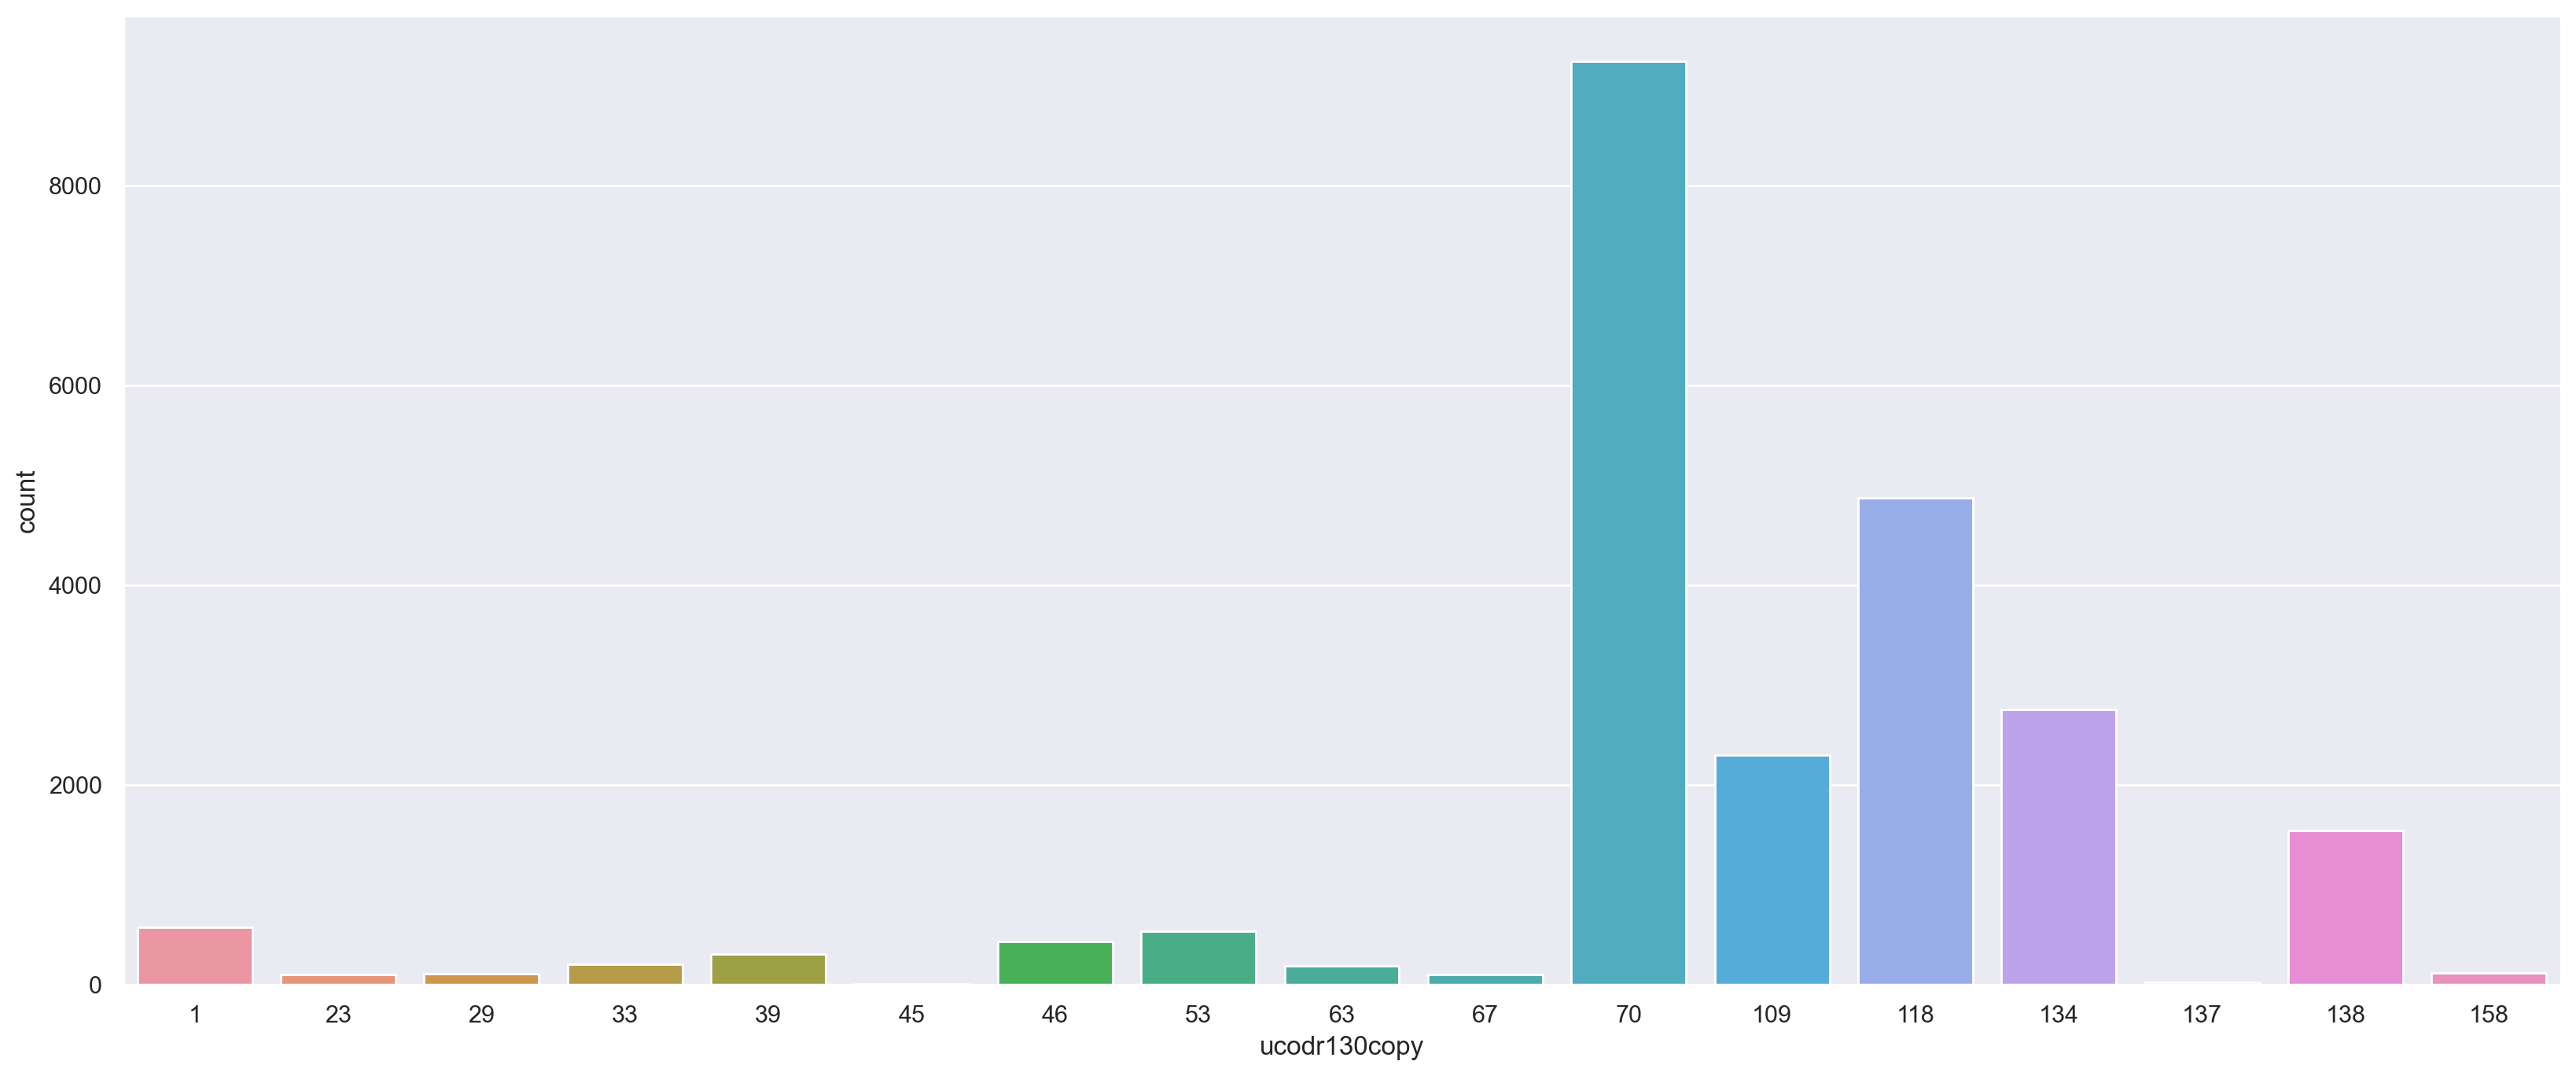

In [10]:
#16 Classes of Infant Death
plt.figure(figsize=(20,8),dpi=200)
sns.countplot(x='ucodr130copy',data=df_int)
plt.show()

### Looking for Best Features and Fine-Tuning Parameters

In [11]:
#Using randomforestclassifier.feature_importances_ to find most important features

X = df_int.drop(['ucodr130copy','ucodr130'],axis=1)
y = df_int['ucodr130copy']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))

imp_features = pd.DataFrame({'col_name': rf.feature_importances_}, index=X.columns).sort_values(by='col_name', ascending=False)

display(imp_features.head(21))

Accuracy score: 0.7011986301369864


,col_name
brthwgt,0.035103
oegest_comb,0.032086
bwtr14,0.031482
aged,0.030476
oegest_r10,0.030029
ager22,0.028320
estrec10,0.024654
ranum,0.024614
econds_2,0.023571
econdp_2,0.021946


In [12]:
#Top 21 features
display(imp_features.head(21).index.tolist())

['brthwgt',
 'oegest_comb',
 'bwtr14',
 'aged',
 'oegest_r10',
 'ager22',
 'estrec10',
 'ranum',
 'econds_2',
 'econdp_2',
 'combgest',
 'lmpused',
 'ager5',
 'apgar5',
 'hospd',
 'eanum',
 'bwtr4',
 'seqnum_co',
 'dob_tt',
 'dwgt_r',
 'apgar5r']

In [13]:
#create test dataframe with top 20 features
df_int20 = df_int[['brthwgt',
 'oegest_comb',
 'oegest_r10',
 'ager22',
 'aged',
 'bwtr14',
 'ager5',
 'econds_2',
 'combgest',
 'econdp_2',
 'eanum',
 'hospd',
 'ranum',
 'obgest_flg',
 'estrec10',
 'apgar5',
 'bwtr4',
 'seqnum_co',
 'dob_tt',
 'dwgt_r',
 'lmpused',
'ucodr130copy'             
              ]]
df_int20

,brthwgt,oegest_comb,oegest_r10,ager22,aged,bwtr14,ager5,econds_2,combgest,econdp_2,...,ranum,obgest_flg,estrec10,apgar5,bwtr4,seqnum_co,dob_tt,dwgt_r,lmpused,ucodr130copy
0,1559,31,3,6,4,6,3,2,31,1,...,4,3,3,8,2,1,1504,100,3,70
1,3288,36,5,14,93,9,5,1,35,2,...,3,3,5,9,3,2,1752,195,3,118
2,2438,39,7,1,0,7,1,0,39,0,...,1,3,7,2,2,3,1222,199,3,118
3,2920,39,7,15,141,8,5,1,39,6,...,2,1,7,10,3,4,1107,168,3,134
4,580,22,2,2,0,2,2,1,22,2,...,2,2,2,2,1,5,613,153,2,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23352,3317,39,7,14,100,9,5,2,39,1,...,3,3,7,9,3,23353,1130,140,3,1
23353,774,24,2,3,1,3,3,1,24,2,...,3,1,2,7,1,23354,730,188,2,70
23354,3080,39,7,13,83,9,5,1,39,1,...,1,1,7,9,3,23355,1847,151,3,134
23355,2325,36,5,2,0,7,2,0,36,0,...,1,3,5,7,2,23356,444,157,3,70


In [14]:
#Preparations of different types of classifiers

log = LogisticRegression()
svc = SVC()
lsvc = LinearSVC()
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()

In [15]:
#Defining a basic model
def base_model(df,model):
    X = df.drop('ucodr130copy',axis=1)
    y = df['ucodr130copy']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy score for {model}: {accuracy_score(y_test, y_pred)}')
    print(f"Precision for for {model}: {precision_recall_fscore_support(y_test, y_pred, average='weighted')[0]}")
    print(f"Recall for for {model}: {precision_recall_fscore_support(y_test, y_pred, average='weighted')[1]}")

In [16]:
base_model(df_int20,log)

Accuracy score for LogisticRegression(): 0.6705479452054794
Precision for for LogisticRegression(): 0.5987354037241198
Recall for for LogisticRegression(): 0.6705479452054794


In [17]:
base_model(df_int20,svc)

Accuracy score for SVC(): 0.6818493150684931
Precision for for SVC(): 0.5937961631257747
Recall for for SVC(): 0.6818493150684931


In [18]:
base_model(df_int20,lsvc)

Accuracy score for LinearSVC(): 0.6587328767123287
Precision for for LinearSVC(): 0.5622142146068916
Recall for for LinearSVC(): 0.6587328767123287


In [19]:
base_model(df_int20,rf)

Accuracy score for RandomForestClassifier(): 0.689041095890411
Precision for for RandomForestClassifier(): 0.6346790249331056
Recall for for RandomForestClassifier(): 0.689041095890411


In [20]:
base_model(df_int20,gbc)

Accuracy score for GradientBoostingClassifier(): 0.6914383561643835
Precision for for GradientBoostingClassifier(): 0.6422316315779202
Recall for for GradientBoostingClassifier(): 0.6914383561643835


In [94]:
#Example of using GridSearch to finetune parameters for each basic model
X = df_int20.drop('ucodr130copy',axis=1)
y = df_int20['ucodr130copy']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gbc = GradientBoostingClassifier()

param_grid = [{
    "loss":['log_loss'],
    "learning_rate": [0.01, 0.1],
    "min_samples_split": np.linspace(0.1, 0.5, 3),
    "min_samples_leaf": np.linspace(0.1, 0.5, 3),
    "max_depth":[5,8,10],
    "max_features":["log2","sqrt"],
    "criterion": ['friedman_mse', 'squared_error'],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators":[10,100]
    }]

grid = GridSearchCV(
        gbc,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        verbose=2
)

grid.fit(X_train, y_train)

print("Best hyperparameters:", grid.best_params_, "\n")

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", test_accuracy, "\n")
print("Test Precision:",precision_recall_fscore_support(y_test, y_pred, average='weighted')[0])
print("Test Recall:",precision_recall_fscore_support(y_test, y_pred, average='weighted')[1])

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_esti

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   2.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.3000000000

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  14.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  15.2s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  14.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  15.5s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  15.3s
[CV] END criter

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_fea

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_sp

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   9.2s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=   9.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=   8.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END criter

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  11.7s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  13.3s
[CV] END criterion=

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  17.6s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  17.5s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  18.1s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  17.7s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.300000

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_sp

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_fea

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   9.2s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   9.2s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  12.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  13.7s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_sample

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  11.6s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_esti

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.1s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.1s
[CV] END criterion=f

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  18.6s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  18.7s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  18.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  19.7s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  20.5s
[CV] END criter

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.1s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.1s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.1s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.5s
[CV] END criterion=f

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   9.5s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_s

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  12.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  12.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  13.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  12.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  13.1s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  13.1s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.5; total

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.1s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.3000000000

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   9.1s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=   9.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=   8.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=   8.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=   9.0s
[CV] END criter

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.3000000000

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.6s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   9.1s
[CV] END criterion=

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  12.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  12.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  13.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  13.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_sample

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  12.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  13.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criterion=f

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   8.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   8.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=   8.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=   8.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.300000

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  11.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criter

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.7s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  14.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  14.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  14.5s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  14.6s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  15.4s
[CV] END c

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, ma

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_sampl

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   8.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   9.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   8.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=   8.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END c

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  11.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  12.2s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  18.1s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   2.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   2.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.2s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.2s
[CV] END criter

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=  15.2s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  24.4s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  30.6s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  22.1s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.3

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_sampl

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, ma

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   8.7s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   8.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   8.7s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   8.7s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_s

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=   7.8s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  10.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  11.0s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  10.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   

[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criter

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  13.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  13.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  18.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  18.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  18.8s
[CV] END criterion=f

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  18.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  18.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   8.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   8.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  13.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  13.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_feat

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  13.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  13.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  13.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  13.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estima

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.300000000000000

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   8.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=   8.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=   8.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END criterion=f

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.300000000000000

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   9.0s
[CV] END criterion=fried

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  47.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  52.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  45.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  45.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_spl

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  43.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   2.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   2.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   2.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, mi

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   2.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   4.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   6.2s
[CV] END criterion=friedm

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  27.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  27.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  32.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  31.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   5.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   7.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   6.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   5.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   4.2s
[CV] END criterion=friedm

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   4.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   5.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=  39.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=  31.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.3000000000000

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  41.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  30.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  27.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  41.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  29.0s
[CV] END criterion=f

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   2.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   3.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   3.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   2.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   2.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   2.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   2.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  19.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  18.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  15.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  14.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  11.8s
[CV] END criterion=f

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.2s
[CV] END criterion=friedm

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  14.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  16.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  28.2s
[CV] END criterion=fri

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  35.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  25.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  21.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  32.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   1.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   1.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   1.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   1.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=  10.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=  12.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=  17.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_featu

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  19.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  24.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  22.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  17.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_spl

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.300000000000000

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=  13.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=  19.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=  18.9s
[CV] END criterion=fri

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  34.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  32.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  22.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  26.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  37.2s
[CV] END criter

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   2.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   2.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   2.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   2.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   2.0s
[CV] END criterion=f

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  18.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  17.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  12.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  11.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_sample

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  17.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  16.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  18.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  23.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   1.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   1.6s
[CV] END criterion=f

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=  11.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=  12.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  11.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  10.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  12.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  22.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  20.6s
[CV] END criter

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   2.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   2.9s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   3.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   3.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.3000000000

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=  13.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=  15.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=  15.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=  18.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  28.0s
[CV] END criter

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  16.5s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  16.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  18.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  23.4s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_sample

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   2.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   2.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_sp

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  15.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  12.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  11.4s
[CV] END criterio

[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  11.8s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  14.1s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  15.0s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  15.7s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.300000

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   3.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   3.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   2.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   2.6s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   2.5s
[CV] END criter

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=  14.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=  14.7s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=  16.2s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=  20.4s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.3

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  25.1s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  25.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  18.5s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.5;

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.6s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.6s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.6s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.5s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, ma

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   2.2s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   2.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=  12.2s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=  10.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_sam

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  14.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  10.2s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=   9.5s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  13.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  15.2s
[CV] END c

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.0s
[CV] END criter

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  17.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  15.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  15.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  18.2s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  29.0s
[CV] END c

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  25.2s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  24.5s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  20.5s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  19.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_sampl

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   9.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   8.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   8.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   8.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  12.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  12.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  13.1s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  12.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_s

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.1s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   8.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   9.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   9.0s
[CV] END cr

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  19.7s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  19.7s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  19.6s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  19.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.4s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.4s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.4s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.5s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criter

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   8.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  12.7s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_s

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  13.1s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  12.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  13.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  13.1s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criter

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.1s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   8.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   8.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=   8.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=   7.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  11.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  11.1s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  11.0s
[CV] END c

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.7s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.7s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.7s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.7s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=  11.2s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=  11.2s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=  11.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  14.5s
[CV] END c

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  12.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  12.7s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  12.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  12.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_s

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_sampl

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.1s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.1s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END cri

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=   8.6s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=   7.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=   8.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.3

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   1.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   1.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   1.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   1.8s
[CV] END c

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=  11.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=  11.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=  11.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=  11.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_spli

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  14.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  15.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  14.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  14.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.5; total tim

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=1

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=   8.6s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=   7.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=   7.8s
[CV] 

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END c

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  12.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  12.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  12.9s
[CV] EN

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  16.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  18.4s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  17.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  17.7s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_spli

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   2.7s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   2.7s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   2.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   1.6s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time= 1.6min
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time= 1.8min
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  55.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time= 1.3min
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, 

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.0s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.

[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.1s
[CV] END criterion=squared_error, learning_rate=0.01, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.1s
[CV] END c

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  18.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  18.7s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  19.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  19.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  20.2s
[CV] END criter

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.5s
[CV] END criterion=s

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.4s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=   8.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_s

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  13.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  13.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  13.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  13.4s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  13.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  13.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.5; total

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.3000000000

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=   8.6s
[CV] END criter

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.3000000000

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.6s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   9.0s
[CV] END criterion=

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  13.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  13.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  13.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  13.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_sample

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  13.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  13.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criterion=s

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   9.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   8.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.300000

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  11.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.3s
[CV] END criterion=

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.3000000000

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  15.6s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  15.6s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  15.5s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  15.4s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  16.1s
[CV] END criter

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_fea

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_sp

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  12.7s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  11.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  11.6s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  11.6s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  11.6s
[CV] END criter

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  15.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  14.6s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.5; total

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.7s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   2.8s
[CV] END criterion=s

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  17.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  17.4s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  17.4s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  17.4s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.300000

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_sp

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.4s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   1.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_fea

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   9.4s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   9.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  14.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=  13.7s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_sample

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  11.4s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_esti

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=8, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.1s
[CV] END criterion=s

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  21.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  20.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  20.3s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  20.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.1, n_estimators=100, subsample=1.0; total time=  21.6s
[CV] END c

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=0.9; total time=   1.5s
[CV] END criter

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.6s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.4s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   1.6s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.5; total time=  10.4s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samp

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   9.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  15.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  14.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=  15.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  14.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  15.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  15.5s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.5; total time=   1.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   1.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=10, subsample=1.0; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.30000

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=log2, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END c

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000000000000004, n_estimators=10, subsample=0.5; total time=   1.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.30000

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.1, min_samples_split=0.5, n_estimators=10, subsample=1.0; total time=   1.5s
[CV] END criter

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  13.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  13.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  13.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.1, n_estimators=100, subsample=0.9; total time=  13.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_s

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  13.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  13.0s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.30000000000000004, n_estimators=100, subsample=1.0; total time=  13.2s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.30000000000000004, min_samples_split=0.5, n_estimators=10, subsample=0.5; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sq

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=0.9; total time=   0.9s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.1, n_estimators=10, subsample=1.0; total time=   0.8s
[CV] END criter

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.5; total time=   8.8s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.30000000000000004, n_estimators=100, subsample=0.9; total time=   8.7s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.3

[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  11.1s
[CV] END criterion=squared_error, learning_rate=0.1, loss=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=0.5, min_samples_split=0.5, n_estimators=100, subsample=1.0; total time=  10.9s
Best hyperparameters: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.30000000000000004, 'n_estimators': 100, 'subsample': 0.9} 

Test set accuracy: 0.6917808219178082 

Test Precision: 0.6330230067801185
Test Recall: 0.6917808219178082


In [95]:
#Example of GridSearch on Voting Classifier
X = df_int20.drop('ucodr130copy',axis=1)
y = df_int20['ucodr130copy']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model2 = SVC(C= 2.25, gamma= 0.1, kernel= 'rbf',probability=True,random_state=42)
model3 = RandomForestClassifier(
                bootstrap= False, criterion= 'entropy', max_depth= 50, max_features= 'log2', 
                min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100, random_state=42)
model4 = GradientBoostingClassifier(
                criterion= 'squared_error', learning_rate= 0.1, loss= 'log_loss', max_depth= 5, 
                max_features= 'log2', min_samples_leaf= 0.1, min_samples_split= 0.1, n_estimators= 100, 
                subsample= 1.0, random_state=42)

ensemble = VotingClassifier(estimators=[('svc',model2),('rf', model3),('gbc',model4)])

param_grid = {'voting':['hard', 'soft'],
              'weights':[(0,1,1), (1,0,1), 
                         (1,1,0), (1,2,2),
                         (1,1,2), (1,2,1),
                         (2,0,2), (2,0,3),
                         (2,0,1), (3,0,2),
                         (2,1,2), (2,2,1), 
                         (1,2,3), (1,3,2),
                         (3,1,2), (3,2,1),
                         (0,2,2)]}

scoring = {'precision': make_scorer(precision_score, average = 'weighted'),
           'recall': make_scorer(recall_score, average = 'weighted')}

grid = GridSearchCV(ensemble,
                    param_grid=param_grid,
                    scoring=scoring,
                    cv=5,
                    verbose=2,
                    refit='precision')

grid.fit(X_train, y_train)

print("Best hyperparameters:", grid.best_params_, "\n")

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

print("Accuracy on training set: {:.4f}".format(best_model.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(best_model.score(X_test, y_test)))
print("Precision on training set:",precision_recall_fscore_support(y_train, y_pred_train, average='weighted')[0])
print("Precision on test set:",precision_recall_fscore_support(y_test, y_pred, average='weighted')[0])
print("Recall on training set:",precision_recall_fscore_support(y_train, y_pred_train, average='weighted')[1])
print("Recall on test set:",precision_recall_fscore_support(y_test, y_pred, average='weighted')[1])

Fitting 5 folds for each of 34 candidates, totalling 170 fits
[CV] END .....................voting=hard, weights=(0, 1, 1); total time= 1.6min
[CV] END .....................voting=hard, weights=(0, 1, 1); total time= 1.6min
[CV] END .....................voting=hard, weights=(0, 1, 1); total time= 1.6min
[CV] END .....................voting=hard, weights=(0, 1, 1); total time= 1.6min
[CV] END .....................voting=hard, weights=(0, 1, 1); total time= 1.6min
[CV] END .....................voting=hard, weights=(1, 0, 1); total time= 1.6min
[CV] END .....................voting=hard, weights=(1, 0, 1); total time= 1.6min
[CV] END .....................voting=hard, weights=(1, 0, 1); total time= 1.6min
[CV] END .....................voting=hard, weights=(1, 0, 1); total time= 1.6min
[CV] END .....................voting=hard, weights=(1, 0, 1); total time= 1.6min
[CV] END .....................voting=hard, weights=(1, 1, 0); total time= 1.6min
[CV] END .....................voting=hard, weig

[CV] END .....................voting=soft, weights=(1, 2, 2); total time= 9.0min
[CV] END .....................voting=soft, weights=(1, 2, 2); total time= 9.0min
[CV] END .....................voting=soft, weights=(1, 2, 2); total time= 8.8min
[CV] END .....................voting=soft, weights=(1, 2, 2); total time= 8.8min
[CV] END .....................voting=soft, weights=(1, 1, 2); total time= 8.7min
[CV] END .....................voting=soft, weights=(1, 1, 2); total time= 8.6min
[CV] END .....................voting=soft, weights=(1, 1, 2); total time= 8.5min
[CV] END .....................voting=soft, weights=(1, 1, 2); total time= 8.4min
[CV] END .....................voting=soft, weights=(1, 1, 2); total time= 7.3min
[CV] END .....................voting=soft, weights=(1, 2, 1); total time= 6.8min
[CV] END .....................voting=soft, weights=(1, 2, 1); total time= 6.7min
[CV] END .....................voting=soft, weights=(1, 2, 1); total time= 6.3min
[CV] END ...................

#### After using GridSearch to fine-tune each basic model, we ended using a majority ensemble method for classification to create the best model based on the precision and recall metrics. Due to the fact that we have very imbalanced classes, accuracy was not the best metric to base our model on. We choose instead to focus on getting the highest possible precision and recall which helps ensure that true cases are not missed (high recall) and diagnosed cases are accurate (high precision) . 
#### One thing to note is that we dropped any feature scaling. Initially we kept the feature scaling even though it did not make a difference to our model however we eliminated it when we realized that it was not allowing us to make accurate predictions.
#### We also trimmed down the number of input features based on their definitions and user friendliness. This resulted in 8 input features. 

In [21]:
#Final dataframe we are working with

df_intx = df_int[
['brthwgt',#Imputed Birthweight in grams
'aged',#Age at Death in Days
'oegest_r10',#Obstetric Estimate Recode10
'ranum',#Number of Record-Axis Conditions 
'estrec10',#Combined Gestation Recode 10
'eanum',#Number of Entity-Axis Conditions
'apgar5r',#Five Minute APGAR Recode
'hospd',#Place of Death and Decendent’s Status
'ucodr130copy'#Selected Causes of Infant Death
]]

df_intx

,brthwgt,aged,oegest_r10,ranum,estrec10,eanum,apgar5r,hospd,ucodr130copy
0,1559,4,3,4,3,4,3,1,70
1,3288,93,5,3,5,3,4,2,118
2,2438,0,7,1,7,1,1,1,118
3,2920,141,7,2,7,2,4,2,134
4,580,0,2,2,2,3,1,1,70
...,...,...,...,...,...,...,...,...,...
23352,3317,100,7,3,7,3,4,2,1
23353,774,1,2,3,2,4,3,1,70
23354,3080,83,7,1,7,1,4,2,134
23355,2325,0,5,1,5,1,3,1,70


In [22]:
#Rename Column Names
pd.options.mode.chained_assignment = None  # default='warn'-->This removes the warning

df_intx.rename(columns={
'brthwgt':'Birthweight (grams)',
'aged': 'Age at Death (days)',
'oegest_r10':'Obstetric Estimate',
'ranum':'Number of Record-Axis Conditions', 
'estrec10':'Combined Gestation',
'eanum':'Number of Entity-Axis Conditions',
'apgar5r':'Five Minute APGAR',
'hospd':'Place of Death and Descendent’s Status',
'ucodr130copy':'Selected Causes of Infant Death'
},inplace=True)

df_intx

,Birthweight (grams),Age at Death (days),Obstetric Estimate,Number of Record-Axis Conditions,Combined Gestation,Number of Entity-Axis Conditions,Five Minute APGAR,Place of Death and Descendent’s Status,Selected Causes of Infant Death
0,1559,4,3,4,3,4,3,1,70
1,3288,93,5,3,5,3,4,2,118
2,2438,0,7,1,7,1,1,1,118
3,2920,141,7,2,7,2,4,2,134
4,580,0,2,2,2,3,1,1,70
...,...,...,...,...,...,...,...,...,...
23352,3317,100,7,3,7,3,4,2,1
23353,774,1,2,3,2,4,3,1,70
23354,3080,83,7,1,7,1,4,2,134
23355,2325,0,5,1,5,1,3,1,70


In [23]:
#Some additional minor data transformation
df_intx['Obstetric Estimate'] = df_intx['Obstetric Estimate'].replace(99, 11)
df_intx['Combined Gestation'] = df_intx['Combined Gestation'].replace(99, 11)
df_intx['Place of Death and Descendent’s Status'] = df_intx['Place of Death and Descendent’s Status'].replace(9, 8)

In [11]:
#Save final dataframe to CSV file
df_intx.to_csv('df_intx.csv', index=False)